%%bash

unzip train.tsv.zip

In [3]:
import pandas as pd

train = pd.read_csv('train.tsv', sep='\t')
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
test = pd.read_csv('test.tsv', sep='\t')
print(test.head())

   PhraseId  SentenceId                                             Phrase
0    156061        8545  An intermittently pleasing but mostly routine ...
1    156062        8545  An intermittently pleasing but mostly routine ...
2    156063        8545                                                 An
3    156064        8545  intermittently pleasing but mostly routine effort
4    156065        8545         intermittently pleasing but mostly routine


## Sentiment Labels

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

<AxesSubplot:>

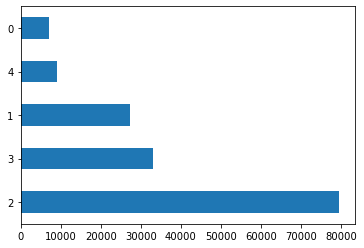

In [3]:
train['Sentiment'].value_counts().plot(kind='barh')

In [4]:
trainDeDuped = train.drop_duplicates(subset=['SentenceId'], keep='first')
trainDeDuped.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
63,64,2,"This quiet , introspective and entertaining in...",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspe...",1
116,117,4,A positively thrilling combination of ethnogra...,3
156,157,5,Aggressive self-glorification and a manipulati...,1


In [5]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [6]:
import numpy as np

Xids = np.zeros((len(train), 50))
Xmask = np.zeros((len(train), 50))

Xids.shape, Xmask.shape

((156060, 50), (156060, 50))

In [7]:
for i, sequence in enumerate(train["Phrase"]):
    tokens = tokenizer.encode_plus(sequence, max_length=50, 
                               truncation=True, padding="max_length",
                               add_special_tokens=True, return_token_type_ids=False,
                               return_attention_mask=True, return_tensors="tf"
                              )
    Xids[i, :], Xmask[i, :] = tokens["input_ids"], tokens["attention_mask"]


In [5]:
train_df = train[['Phrase','Sentiment']]
train_df

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2
...,...,...
156055,Hearst 's,2
156056,forced avuncular chortles,1
156057,avuncular chortles,3
156058,avuncular,2


In [13]:
phrase = train_df['Phrase']
phrase

0         seri escapad demonstr adag good goos also good...
1                      seri escapad demonstr adag good goos
2                                                      seri
4                                                      seri
5                           escapad demonstr adag good goos
                                ...                        
156055                                               hearst
156056                                forc avuncular chortl
156057                                     avuncular chortl
156058                                            avuncular
156059                                               chortl
Name: Phrase, Length: 154674, dtype: object

In [14]:
sentiment = train_df['Sentiment']
sentiment

0         1
1         2
2         2
4         2
5         2
         ..
156055    2
156056    1
156057    3
156058    2
156059    2
Name: Sentiment, Length: 154674, dtype: int64

In [11]:
!python3 -m pip install nltk

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import text_to_word_sequence
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
import numpy as np
import pandas as pd
import nltk
from keras.preprocessing.text import text_to_word_sequence
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [7]:
def TextPreprocessing(text):
    text=str(text)
    text = text.replace("'","")
    tokenized_train_data = text_to_word_sequence(text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=" ")
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_data if not i in stop_words]
    stopwordremove_text = ' '.join(stopwordremove)
    numberRemove = ''.join(num for num in stopwordremove_text if not num.isdigit())
    stemmer = PorterStemmer()
    stem_input = nltk.word_tokenize(numberRemove)
    stem_text = ' '.join([stemmer.stem(word) for word in stem_input])
    return stem_text.lower()



In [15]:
df = train['Phrase'].copy()
df


0         A series of escapades demonstrating the adage ...
1         A series of escapades demonstrating the adage ...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [10]:
train_df['Phrase'] = train_df['Phrase'].apply(TextPreprocessing)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [11]:
train_df['Phrase'].replace('',np.nan,inplace =True)
train_df.dropna(subset = ['Phrase'],inplace =True)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [15]:
train_x,test_x,train_y,test_y = train_test_split(phrase,sentiment,test_size=0.2,random_state=2)

In [16]:
vectorizer = TfidfVectorizer()
tfidf_text = vectorizer.fit_transform(train_x)


In [17]:
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean')),
               ])

knn.fit(train_x, train_y)

test_predict = knn.predict(test_x)

train_accuracy = round(knn.score(train_x, train_y)*100)
test_accuracy =round(accuracy_score(test_predict, test_y)*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy ))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy ))
print()

K-Nearest Neighbour Train Accuracy Score : 73% 
K-Nearest Neighbour Test Accuracy Score  : 61% 



In [19]:
test['Phrase'] = test['Phrase'].apply(TextPreprocessing)

In [ ]:
test_id = test['PhraseId']
test_text = test['Phrase']
y_prdict = knn.predict(test_text)

In [ ]:
submission = pd.DataFrame(list(zip(test_id, y_prdict)),
               columns =['PhraseId', 'Sentiment'])
submission.head(20)

In [ ]:
submission.to_csv('submission.csv', index=False)